In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
# August 2021 Station2 classified images; now predicted by resnet 50 model
classified_predicted = pd.read_csv("/mnt/class_data/Nele/ROIs_August2021/predictions_resnet50_St02.csv")
print(classified_predicted.head())

# extract word inbetween last '/' and first '__'  in 'image_path' column to get true label
classified_predicted['true_label'] = classified_predicted['image_path'].apply(lambda x: x.split('/')[-1].split('__')[0])
print(classified_predicted.head())

# ## filter out unused categories
# classified_predicted = classified_predicted[~classified_predicted['true_label'].isin(['other', 'unk', 'DS', 'Thumbs.ds', 'thumbs.db', 'schlerin','heterop','dolphoro','pteropod','cope', 'fishfish', 'salchain', 'tricho_Basler_avA2300-25gm', 'shrimp_amphi_Basler_avA2300-25gm', 'hyrdo'])]
# classified_predicted['true_label'].value_counts()
# print(classified_predicted.head())

                                          image_path  pred_class_index  \
0  /mnt/class_data/Nele/ROIs_August2021/Station2_...                25   
1  /mnt/class_data/Nele/ROIs_August2021/Station2_...                 0   
2  /mnt/class_data/Nele/ROIs_August2021/Station2_...                15   
3  /mnt/class_data/Nele/ROIs_August2021/Station2_...                 2   
4  /mnt/class_data/Nele/ROIs_August2021/Station2_...                 0   

  pred_class_label  confidence  
0            stoma    0.506208  
1            amphi    0.908758  
2            ptero    0.516208  
3              app    0.593635  
4            amphi    0.946071  
                                          image_path  pred_class_index  \
0  /mnt/class_data/Nele/ROIs_August2021/Station2_...                25   
1  /mnt/class_data/Nele/ROIs_August2021/Station2_...                 0   
2  /mnt/class_data/Nele/ROIs_August2021/Station2_...                15   
3  /mnt/class_data/Nele/ROIs_August2021/Station2_...         

In [12]:
classified_predicted[classified_predicted['true_label']=='shrimp']

,image_path,pred_class_index,pred_class_label,confidence,true_label
4700,/mnt/class_data/Nele/ROIs_August2021/Station2_...,22,shrimp,0.998818,shrimp
4701,/mnt/class_data/Nele/ROIs_August2021/Station2_...,22,shrimp,0.834381,shrimp
4702,/mnt/class_data/Nele/ROIs_August2021/Station2_...,22,shrimp,0.998996,shrimp
4703,/mnt/class_data/Nele/ROIs_August2021/Station2_...,22,shrimp,0.936130,shrimp
4704,/mnt/class_data/Nele/ROIs_August2021/Station2_...,14,poly,0.992612,shrimp
...,...,...,...,...,...
6109,/mnt/class_data/Nele/ROIs_August2021/Station2_...,14,poly,0.688019,shrimp
6110,/mnt/class_data/Nele/ROIs_August2021/Station2_...,22,shrimp,0.999963,shrimp
6111,/mnt/class_data/Nele/ROIs_August2021/Station2_...,22,shrimp,0.999298,shrimp
6112,/mnt/class_data/Nele/ROIs_August2021/Station2_...,14,poly,0.826657,shrimp


In [13]:
classified_predicted.true_label.value_counts()

true_label
shrimp                              1414
hydro                               1201
other                                702
rhiz                                 676
dolio                                538
chaeto                               373
tricho                               326
cteno                                290
app                                  274
snow                                 239
poly                                 170
siphon                               160
copepod                               94
salp                                  89
dolnurse                              77
fish                                  59
salpchain                             42
sapphir                               24
ptero                                 22
dolphor                               20
zooea                                 20
stoma                                 17
diatom                                13
dolphoro                              11
scyph

Predicted Label                   amphi  anemo  app  bubble  chaeto  copepod  \
True Label                                                                     
amphi                                 2      0    1       0       0        0   
app                                   0      0  216       0       2        0   
chaeto                                0      0   10       0     297        2   
copepod                               0      0    1       0       0       60   
cteno                                 0      0    0       7       0        2   
diatom                                0      0    0       0       1        0   
dolio                                 0      1    1       0       2        0   
dolnurse                              0      0    0       0       0        0   
dolphor                               0      0    1       0       0        0   
dolphoro                              0      0    0       0       0        0   
fish                                  0 

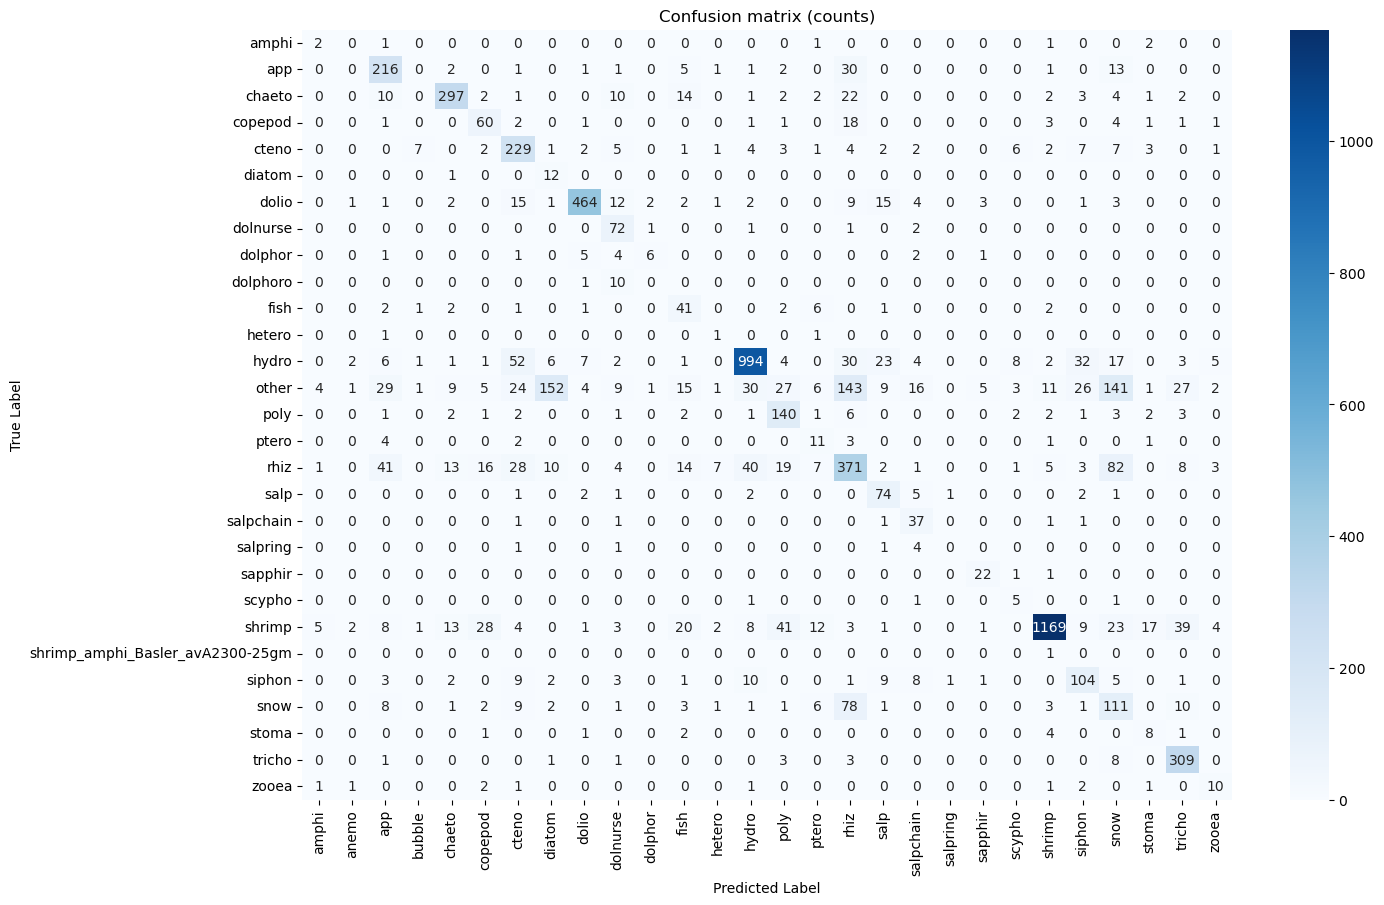

In [6]:
confusion_matrix1 = pd.crosstab(
    classified_predicted['true_label'],
    classified_predicted['pred_class_label'],
    rownames=['True Label'],
    colnames=['Predicted Label']
)
print(confusion_matrix1)

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix1, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix (counts)")
plt.show()

Predicted Label                      amphi     anemo       app    bubble  \
True Label                                                                 
amphi                             0.285714  0.000000  0.142857  0.000000   
app                               0.000000  0.000000  0.788321  0.000000   
chaeto                            0.000000  0.000000  0.026810  0.000000   
copepod                           0.000000  0.000000  0.010638  0.000000   
cteno                             0.000000  0.000000  0.000000  0.024138   
diatom                            0.000000  0.000000  0.000000  0.000000   
dolio                             0.000000  0.001859  0.001859  0.000000   
dolnurse                          0.000000  0.000000  0.000000  0.000000   
dolphor                           0.000000  0.000000  0.050000  0.000000   
dolphoro                          0.000000  0.000000  0.000000  0.000000   
fish                              0.000000  0.000000  0.033898  0.016949   
hetero      

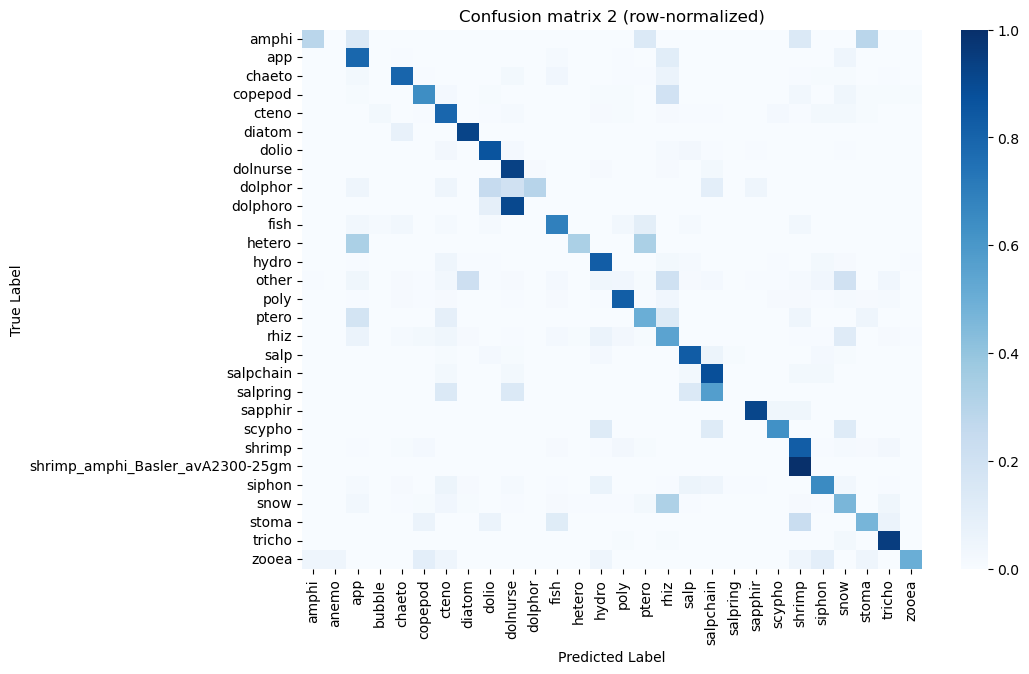

In [7]:
# True-vs-predicted matrix, normalized per true label
confusion_matrix2 = pd.crosstab(
    classified_predicted['true_label'],
    classified_predicted['pred_class_label'],
    rownames=['True Label'],
    colnames=['Predicted Label'],
    normalize='index'
)

print(confusion_matrix2)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix2, annot=False, fmt=".2f", cmap="Blues")
plt.title("Confusion matrix 2 (row-normalized)")
plt.show()

In [8]:
## visualize 'other' category
# create a profile for the station
# create profile with gt and another one for predicted labels
# compare both profiles
# do patterns change?

# visualisation of all 'other' images in a grid with predicted labels

In [ ]:
## try this on ISIIS data
# https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html